In [1]:
# Read json file.
import json

with open("/Users/computingvictor/Documents/Workspace/hackathon-caixabank-data-ai-report/new_data/train_fraud_labels.json", "r") as file:
    data = json.load(file)

    # Load transaction data.
import pandas as pd
transaction_df = pd.read_csv("transactions_data_merged.csv")

In [2]:
transaction_df

,transactions_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,...,7,Female,594 Mountain View Street,46.80,-100.76,$23679,$48277,$110153,740,4
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,...,6,Male,604 Pine Street,40.80,-91.12,$18076,$36853,$112139,834,5
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,...,4,Male,2379 Forest Lane,33.18,-117.29,$16894,$34449,$36540,686,3
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,...,5,Female,903 Hill Boulevard,41.42,-87.35,$26168,$53350,$128676,685,5
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,...,5,Male,166 River Drive,38.86,-76.60,$33529,$68362,$96182,711,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,...,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,...,9,Male,6076 Bayview Boulevard,43.06,-87.96,$9995,$20377,$12092,789,4
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,TX,75002.0,...,4,Female,7927 Plum Lane,33.10,-96.66,$32580,$78329,$40161,720,3
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,CA,94014.0,...,12,Female,5887 Seventh Lane,37.68,-122.43,$23752,$48430,$62384,716,2


In [3]:
# Extraer el diccionario de etiquetas dentro de "target"
labels = data["target"]

# Crear una columna 'fraud_label' en el DataFrame 'transaction_df' usando el diccionario 'labels'
transaction_df["fraud_label"] = transaction_df["transactions_id"].astype(str).map(labels)
transaction_df

,transactions_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,fraud_label
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,...,Female,594 Mountain View Street,46.80,-100.76,$23679,$48277,$110153,740,4,No
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,...,Male,604 Pine Street,40.80,-91.12,$18076,$36853,$112139,834,5,No
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,...,Male,2379 Forest Lane,33.18,-117.29,$16894,$34449,$36540,686,3,No
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,...,Female,903 Hill Boulevard,41.42,-87.35,$26168,$53350,$128676,685,5,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,...,Male,166 River Drive,38.86,-76.60,$33529,$68362,$96182,711,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,...,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5,No
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,...,Male,6076 Bayview Boulevard,43.06,-87.96,$9995,$20377,$12092,789,4,No
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,TX,75002.0,...,Female,7927 Plum Lane,33.10,-96.66,$32580,$78329,$40161,720,3,No
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,CA,94014.0,...,Female,5887 Seventh Lane,37.68,-122.43,$23752,$48430,$62384,716,2,NaN


In [4]:
# Read json file.
import json

with open("/Users/computingvictor/Documents/Workspace/hackathon-caixabank-data-ai-report/predictions/predictions_3.json", "r") as file:
    predictions = json.load(file)

In [5]:
# Extraer el diccionario de etiquetas dentro de "target"
predictions_label = predictions["target"]

# Crear una columna 'fraud_label' en el DataFrame 'transaction_df' usando el diccionario 'labels'
transaction_df["Prediction"] = transaction_df["transactions_id"].astype(str).map(predictions_label)
transaction_df

,transactions_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,fraud_label,Prediction
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,...,594 Mountain View Street,46.80,-100.76,$23679,$48277,$110153,740,4,No,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,...,604 Pine Street,40.80,-91.12,$18076,$36853,$112139,834,5,No,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,...,2379 Forest Lane,33.18,-117.29,$16894,$34449,$36540,686,3,No,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,...,903 Hill Boulevard,41.42,-87.35,$26168,$53350,$128676,685,5,NaN,No
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,...,166 River Drive,38.86,-76.60,$33529,$68362,$96182,711,2,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,...,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5,No,NaN
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,...,6076 Bayview Boulevard,43.06,-87.96,$9995,$20377,$12092,789,4,No,NaN
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,TX,75002.0,...,7927 Plum Lane,33.10,-96.66,$32580,$78329,$40161,720,3,No,NaN
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,CA,94014.0,...,5887 Seventh Lane,37.68,-122.43,$23752,$48430,$62384,716,2,NaN,NaN


In [83]:
transaction_df_mod = transaction_df.copy()

# Replace the values in the Prediction column with o if the value is nan.
transaction_df_mod["Prediction"] = transaction_df_mod["Prediction"].fillna(0)
# Repalce the values in the Prediction column with 1 if the value is "Yes/No".
transaction_df_mod["Prediction"] = transaction_df_mod["Prediction"].replace("Yes", 1)
transaction_df_mod["Prediction"] = transaction_df_mod["Prediction"].replace("No", 1)

# Replace fraud_label with 0 if the value is 'No' and 1 if the value is 'Yes'.
transaction_df_mod["fraud_label"] = transaction_df_mod["fraud_label"].replace("No", 0)
transaction_df_mod["fraud_label"] = transaction_df_mod["fraud_label"].replace("Yes", 1)

transaction_df_mod

/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_88880/1817813147.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transaction_df_mod["Prediction"] = transaction_df_mod["Prediction"].replace("No", 1)
/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_88880/1817813147.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transaction_df_mod["fraud_label"] = transaction_df_mod["fraud_label"].replace("Yes", 1)


,transactions_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,fraud_label,Prediction
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN,Mastercard,Debit (Prepaid),5497590243197280,07/2022,306,YES,2,$55,05/2008,2008,No,30,67,1989,7,Female,594 Mountain View Street,46.80,-100.76,$23679,$48277,$110153,740,4,0.0,0
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN,Mastercard,Credit,5175842699412235,12/2024,438,YES,1,$9100,09/2005,2015,No,48,67,1971,6,Male,604 Pine Street,40.80,-91.12,$18076,$36853,$112139,834,5,0.0,0
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN,Mastercard,Debit,5874992802287595,05/2020,256,YES,1,$14802,01/2006,2008,No,49,65,1970,4,Male,2379 Forest Lane,33.18,-117.29,$16894,$34449,$36540,686,3,0.0,0
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN,Mastercard,Debit,5346827663529174,10/2024,54,NO,2,$37634,05/2004,2006,No,52,67,1967,5,Female,903 Hill Boulevard,41.42,-87.35,$26168,$53350,$128676,685,5,NaN,1
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN,Visa,Debit,4354185735186651,01/2020,120,YES,1,$19113,07/2009,2014,No,51,69,1968,5,Male,166 River Drive,38.86,-76.60,$33529,$68362,$96182,711,2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,NaN,Mastercard,Debit,5766352389579834,02/2020,992,YES,1,$26743,03/2019,2019,No,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5,0.0,0
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,5815,NaN,Mastercard,Debit,5960254965868032,06/2024,91,YES,1,$5141,03/2004,2012,No,62,66,1957,9,Male,6076 Bayview Boulevard,43.06,-87.96,$9995,$20377,$12092,789,4,0.0,0
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,NaN,Mastercard,Debit,5930100401040067,06/2021,908,YES,1,$17686,02/2004,2007,No,67,67,1952,4,Female,7927 Plum Lane,33.10,-96.66,$32580,$78329,$40161,720,3,0.0,0
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,NaN,Visa,Debit,4696464603505748,11/2021,762,YES,2,$14036,11/2005,2010,No,44,69,1975,12,Female,5887 Seventh Lane,37.68,-122.43,$23752,$48430,$62384,716,2,NaN,0


In [84]:
transaction_df_mod.Prediction.value_counts()

Prediction
0    10414963
1     2890952
Name: count, dtype: int64

In [85]:
# Displayrows with fraud_label == Yes.
transaction_df_mod[transaction_df_mod["fraud_label"] == 1]

,transactions_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,fraud_label,Prediction
3459,7479444,2010-01-01 23:56:00,126,5497,$0.19,Online Transaction,90999,ONLINE,NaN,NaN,4722,NaN,Mastercard,Debit,5110177937842500,04/2023,932,YES,1,$13555,11/2007,2011,No,63,65,1956,10,Male,5159 Wessex Avenue,34.72,-92.35,$13047,$26600,$0,799,4,1.0,0
9526,7486725,2010-01-03 20:58:00,126,5497,$339.00,Online Transaction,3558,ONLINE,NaN,NaN,3640,NaN,Mastercard,Debit,5110177937842500,04/2023,932,YES,1,$13555,11/2007,2011,No,63,65,1956,10,Male,5159 Wessex Avenue,34.72,-92.35,$13047,$26600,$0,799,4,1.0,0
12989,7490901,2010-01-04 23:30:00,720,4136,$4.45,Online Transaction,24504,ONLINE,NaN,NaN,4214,NaN,Mastercard,Debit,5549447642972376,08/2021,647,YES,1,$974,08/2004,2008,No,36,65,1983,5,Female,980 Federal Drive,42.38,-83.10,$9710,$19800,$40038,682,3,1.0,0
13000,7490914,2010-01-04 23:48:00,720,4136,$7.19,Online Transaction,38602,ONLINE,NaN,NaN,5311,NaN,Mastercard,Debit,5549447642972376,08/2021,647,YES,1,$974,08/2004,2008,No,36,65,1983,5,Female,980 Federal Drive,42.38,-83.10,$9710,$19800,$40038,682,3,1.0,0
13081,7491008,2010-01-05 02:34:00,1644,3444,$8.76,Online Transaction,21776,ONLINE,NaN,NaN,5712,NaN,Visa,Credit,4715738219735937,07/2023,643,YES,1,$10900,06/2009,2009,No,83,65,1937,1,Male,637 Seventh Street,34.66,-83.09,$15406,$31943,$1248,686,6,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13285478,23736635,2019-10-26 13:44:00,1575,5582,$128.30,Chip Transaction,32070,Rome,Italy,NaN,7011,NaN,Visa,Debit,4753063175082230,02/2020,352,YES,2,$35791,11/2009,2009,No,51,68,1968,5,Female,23 12th Boulevard,27.19,-82.49,$28272,$57646,$127892,724,4,1.0,0
13285493,23736653,2019-10-26 13:50:00,451,5810,$94.49,Chip Transaction,41375,Rome,Italy,NaN,5912,NaN,Mastercard,Debit,5238065973168619,09/2023,266,YES,2,$1447,12/2004,2010,No,65,67,1954,12,Male,654 Birch Lane,41.26,-96.01,$14199,$28951,$56777,711,2,1.0,0
13285600,23736786,2019-10-26 14:16:00,797,2839,$120.30,Chip Transaction,7777,Rome,Italy,NaN,3684,NaN,Mastercard,Debit,5326004022460542,04/2023,904,YES,1,$36309,05/2003,2006,No,61,69,1958,9,Female,7945 Fourth Avenue,21.30,-157.85,$30410,$62005,$149968,651,9,1.0,0
13285842,23737098,2019-10-26 15:15:00,1854,3570,$112.44,Chip Transaction,83018,Rome,Italy,NaN,5310,NaN,Mastercard,Credit,5510232749503632,06/2020,400,YES,1,$7200,06/2013,2013,No,48,69,1972,1,Male,4405 Wessex Drive,35.06,-85.25,$23706,$48337,$70603,625,2,1.0,0


In [86]:
transaction_df_mod.fraud_label.value_counts()

fraud_label
0.0    8901631
1.0      13332
Name: count, dtype: int64

DATA PREPROCESSING

In [87]:
# DISPLAY ALL THE COLUMNS IN PANDAS.
pd.set_option("display.max_columns", None)

transaction_df_mod

,transactions_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,fraud_label,Prediction
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN,Mastercard,Debit (Prepaid),5497590243197280,07/2022,306,YES,2,$55,05/2008,2008,No,30,67,1989,7,Female,594 Mountain View Street,46.80,-100.76,$23679,$48277,$110153,740,4,0.0,0
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN,Mastercard,Credit,5175842699412235,12/2024,438,YES,1,$9100,09/2005,2015,No,48,67,1971,6,Male,604 Pine Street,40.80,-91.12,$18076,$36853,$112139,834,5,0.0,0
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN,Mastercard,Debit,5874992802287595,05/2020,256,YES,1,$14802,01/2006,2008,No,49,65,1970,4,Male,2379 Forest Lane,33.18,-117.29,$16894,$34449,$36540,686,3,0.0,0
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN,Mastercard,Debit,5346827663529174,10/2024,54,NO,2,$37634,05/2004,2006,No,52,67,1967,5,Female,903 Hill Boulevard,41.42,-87.35,$26168,$53350,$128676,685,5,NaN,1
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN,Visa,Debit,4354185735186651,01/2020,120,YES,1,$19113,07/2009,2014,No,51,69,1968,5,Male,166 River Drive,38.86,-76.60,$33529,$68362,$96182,711,2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,NaN,Mastercard,Debit,5766352389579834,02/2020,992,YES,1,$26743,03/2019,2019,No,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5,0.0,0
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,5815,NaN,Mastercard,Debit,5960254965868032,06/2024,91,YES,1,$5141,03/2004,2012,No,62,66,1957,9,Male,6076 Bayview Boulevard,43.06,-87.96,$9995,$20377,$12092,789,4,0.0,0
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,NaN,Mastercard,Debit,5930100401040067,06/2021,908,YES,1,$17686,02/2004,2007,No,67,67,1952,4,Female,7927 Plum Lane,33.10,-96.66,$32580,$78329,$40161,720,3,0.0,0
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,NaN,Visa,Debit,4696464603505748,11/2021,762,YES,2,$14036,11/2005,2010,No,44,69,1975,12,Female,5887 Seventh Lane,37.68,-122.43,$23752,$48430,$62384,716,2,NaN,0


In [88]:
transactions_df_mod_cleaned = transaction_df_mod.copy()

# Transform date columns to datetime.
transactions_df_mod_cleaned["date"] = pd.to_datetime(transactions_df_mod_cleaned["date"])

# Split the date column into year, month, and day.
transactions_df_mod_cleaned["year"] = transactions_df_mod_cleaned["date"].dt.year
transactions_df_mod_cleaned["month"] = transactions_df_mod_cleaned["date"].dt.month
transactions_df_mod_cleaned["day"] = transactions_df_mod_cleaned["date"].dt.day

# Drop the date column.
transactions_df_mod_cleaned = transactions_df_mod_cleaned.drop(columns=["date"])



In [89]:
# Modificamos amount
transactions_df_mod_cleaned['amount'] = transactions_df_mod_cleaned['amount'].str.replace('$', '', regex=False)
transactions_df_mod_cleaned['amount'] = pd.to_numeric(transactions_df_mod_cleaned['amount'], errors='coerce')

In [90]:
# Convertimos a string merchant_id y merchant_city y use_chip y errors
# transactions_df_mod_cleaned['merchant_id'] = transactions_df_mod_cleaned['merchant_id'].astype(str)
# transactions_df_mod_cleaned['merchant_city'] = transactions_df_mod_cleaned['merchant_city'].astype(str)
# transactions_df_mod_cleaned['use_chip'] = transactions_df_mod_cleaned['use_chip'].astype(str)

In [91]:
# Check the numebers of Nan values in the DataFrame for each varaible.
transactions_df_mod_cleaned.isna().sum()

# For merchant_state, zip and errors, we will replace the Nan values with 'Desconocido'.
transactions_df_mod_cleaned["merchant_state"] = transactions_df_mod_cleaned["merchant_state"].fillna("Desconocido")
transactions_df_mod_cleaned["zip"] = transactions_df_mod_cleaned["zip"].fillna("Desconocido")
transactions_df_mod_cleaned["errors"] = transactions_df_mod_cleaned["errors"].fillna("Desconocido")

In [92]:
transactions_df_mod_cleaned.has_chip.value_counts()

# Replace the values in the has_chip column with 0 if the value is 'No' and 1 if the value is 'Yes'.
transactions_df_mod_cleaned["has_chip"] = transactions_df_mod_cleaned["has_chip"].replace("NO", 0)
transactions_df_mod_cleaned["has_chip"] = transactions_df_mod_cleaned["has_chip"].replace("YES", 1)

/var/folders/w8/h7t8ndx51cs_sg9y_9cy9vd00000gn/T/ipykernel_88880/4046220610.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transactions_df_mod_cleaned["has_chip"] = transactions_df_mod_cleaned["has_chip"].replace("YES", 1)


In [93]:
# Make the same of amount with credit limit.
transactions_df_mod_cleaned['credit_limit'] = transactions_df_mod_cleaned['credit_limit'].str.replace('$', '', regex=False)
transactions_df_mod_cleaned['credit_limit'] = pd.to_numeric(transactions_df_mod_cleaned['credit_limit'], errors='coerce')


In [94]:
transactions_df_mod_cleaned.card_on_dark_web.value_counts()

# Drop card_on_dark_web column.
transactions_df_mod_cleaned = transactions_df_mod_cleaned.drop(columns=["card_on_dark_web"])


In [95]:
# SAme of amount to per_capita_income, yearly_income, total_debt.
transactions_df_mod_cleaned['per_capita_income'] = transactions_df_mod_cleaned['per_capita_income'].str.replace('$', '', regex=False)
transactions_df_mod_cleaned['per_capita_income'] = pd.to_numeric(transactions_df_mod_cleaned['per_capita_income'], errors='coerce')

transactions_df_mod_cleaned['yearly_income'] = transactions_df_mod_cleaned['yearly_income'].str.replace('$', '', regex=False)
transactions_df_mod_cleaned['yearly_income'] = pd.to_numeric(transactions_df_mod_cleaned['yearly_income'], errors='coerce')

transactions_df_mod_cleaned['total_debt'] = transactions_df_mod_cleaned['total_debt'].str.replace('$', '', regex=False)
transactions_df_mod_cleaned['total_debt'] = pd.to_numeric(transactions_df_mod_cleaned['total_debt'], errors='coerce')

transactions_df_mod_cleaned

,transactions_id,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,fraud_label,Prediction,year,month,day
0,7475327,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,Desconocido,Mastercard,Debit (Prepaid),5497590243197280,07/2022,306,1,2,55,05/2008,2008,30,67,1989,7,Female,594 Mountain View Street,46.80,-100.76,23679,48277,110153,740,4,0.0,0,2010,1,1
1,7475328,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,Desconocido,Mastercard,Credit,5175842699412235,12/2024,438,1,1,9100,09/2005,2015,48,67,1971,6,Male,604 Pine Street,40.80,-91.12,18076,36853,112139,834,5,0.0,0,2010,1,1
2,7475329,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,Desconocido,Mastercard,Debit,5874992802287595,05/2020,256,1,1,14802,01/2006,2008,49,65,1970,4,Male,2379 Forest Lane,33.18,-117.29,16894,34449,36540,686,3,0.0,0,2010,1,1
3,7475331,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,Desconocido,Mastercard,Debit,5346827663529174,10/2024,54,0,2,37634,05/2004,2006,52,67,1967,5,Female,903 Hill Boulevard,41.42,-87.35,26168,53350,128676,685,5,NaN,1,2010,1,1
4,7475332,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,Desconocido,Visa,Debit,4354185735186651,01/2020,120,1,1,19113,07/2009,2014,51,69,1968,5,Male,166 River Drive,38.86,-76.60,33529,68362,96182,711,2,0.0,0,2010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,Desconocido,Mastercard,Debit,5766352389579834,02/2020,992,1,1,26743,03/2019,2019,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,33483,196,698,5,0.0,0,2019,10,31
13305911,23761869,1766,2066,12.80,Online Transaction,39261,ONLINE,Desconocido,Desconocido,5815,Desconocido,Mastercard,Debit,5960254965868032,06/2024,91,1,1,5141,03/2004,2012,62,66,1957,9,Male,6076 Bayview Boulevard,43.06,-87.96,9995,20377,12092,789,4,0.0,0,2019,10,31
13305912,23761870,199,1031,40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,Desconocido,Mastercard,Debit,5930100401040067,06/2021,908,1,1,17686,02/2004,2007,67,67,1952,4,Female,7927 Plum Lane,33.10,-96.66,32580,78329,40161,720,3,0.0,0,2019,10,31
13305913,23761873,1986,5443,4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,Desconocido,Visa,Debit,4696464603505748,11/2021,762,1,2,14036,11/2005,2010,44,69,1975,12,Female,5887 Seventh Lane,37.68,-122.43,23752,48430,62384,716,2,NaN,0,2019,10,31


In [96]:
transactions_df_mod_cleaned.Prediction.value_counts()

Prediction
0    10414963
1     2890952
Name: count, dtype: int64

In [97]:
# Crear el DataFrame 'training' con las filas donde 'prediction es 0.
training = transactions_df_mod_cleaned[transactions_df_mod_cleaned["Prediction"] == 0.0].copy()

# Crear el DataFrame 'Prediction' con las filas donde 'prediction es 1.
Prediction = transactions_df_mod_cleaned[transactions_df_mod_cleaned["Prediction"] == 1.0].copy()

In [98]:
transactions_df_mod_cleaned

,transactions_id,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,fraud_label,Prediction,year,month,day
0,7475327,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,Desconocido,Mastercard,Debit (Prepaid),5497590243197280,07/2022,306,1,2,55,05/2008,2008,30,67,1989,7,Female,594 Mountain View Street,46.80,-100.76,23679,48277,110153,740,4,0.0,0,2010,1,1
1,7475328,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,Desconocido,Mastercard,Credit,5175842699412235,12/2024,438,1,1,9100,09/2005,2015,48,67,1971,6,Male,604 Pine Street,40.80,-91.12,18076,36853,112139,834,5,0.0,0,2010,1,1
2,7475329,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,Desconocido,Mastercard,Debit,5874992802287595,05/2020,256,1,1,14802,01/2006,2008,49,65,1970,4,Male,2379 Forest Lane,33.18,-117.29,16894,34449,36540,686,3,0.0,0,2010,1,1
3,7475331,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,Desconocido,Mastercard,Debit,5346827663529174,10/2024,54,0,2,37634,05/2004,2006,52,67,1967,5,Female,903 Hill Boulevard,41.42,-87.35,26168,53350,128676,685,5,NaN,1,2010,1,1
4,7475332,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,Desconocido,Visa,Debit,4354185735186651,01/2020,120,1,1,19113,07/2009,2014,51,69,1968,5,Male,166 River Drive,38.86,-76.60,33529,68362,96182,711,2,0.0,0,2010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,Desconocido,Mastercard,Debit,5766352389579834,02/2020,992,1,1,26743,03/2019,2019,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,33483,196,698,5,0.0,0,2019,10,31
13305911,23761869,1766,2066,12.80,Online Transaction,39261,ONLINE,Desconocido,Desconocido,5815,Desconocido,Mastercard,Debit,5960254965868032,06/2024,91,1,1,5141,03/2004,2012,62,66,1957,9,Male,6076 Bayview Boulevard,43.06,-87.96,9995,20377,12092,789,4,0.0,0,2019,10,31
13305912,23761870,199,1031,40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,Desconocido,Mastercard,Debit,5930100401040067,06/2021,908,1,1,17686,02/2004,2007,67,67,1952,4,Female,7927 Plum Lane,33.10,-96.66,32580,78329,40161,720,3,0.0,0,2019,10,31
13305913,23761873,1986,5443,4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,Desconocido,Visa,Debit,4696464603505748,11/2021,762,1,2,14036,11/2005,2010,44,69,1975,12,Female,5887 Seventh Lane,37.68,-122.43,23752,48430,62384,716,2,NaN,0,2019,10,31


In [99]:
Prediction

,transactions_id,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,fraud_label,Prediction,year,month,day
3,7475331,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,Desconocido,Mastercard,Debit,5346827663529174,10/2024,54,0,2,37634,05/2004,2006,52,67,1967,5,Female,903 Hill Boulevard,41.42,-87.35,26168,53350,128676,685,5,NaN,1,2010,1,1
8,7475336,335,5131,261.58,Online Transaction,50292,ONLINE,Desconocido,Desconocido,7801,Desconocido,Visa,Debit,4414800408438414,06/2020,833,1,1,23401,10/2008,2011,46,68,1973,7,Female,75 Birch Lane,26.74,-80.12,27696,56467,66565,688,3,NaN,1,2010,1,1
9,7475337,351,1112,10.74,Swipe Transaction,3864,Flushing,NY,11355.0,5813,Desconocido,Mastercard,Debit (Prepaid),5348108239138924,11/2023,893,1,2,54,02/2007,2010,91,70,1928,9,Female,984 Little Creek Lane,40.77,-73.84,13810,17150,375,807,6,NaN,1,2010,1,1
15,7475343,1634,2464,1.09,Swipe Transaction,20519,San Benito,TX,78586.0,5942,Desconocido,Mastercard,Debit,5524436846278703,07/2020,697,1,2,8638,04/2004,2014,66,68,1953,3,Male,703 West Drive,26.18,-98.11,10091,20577,60152,825,4,NaN,1,2010,1,1
34,7475364,1201,16,2.95,Swipe Transaction,61195,Woburn,MA,1801.0,5541,Desconocido,Visa,Debit,4817273521248161,10/2023,706,1,2,55693,01/2000,2006,60,66,1959,11,Male,175 Valley Drive,42.36,-71.36,56632,115465,195657,715,4,NaN,1,2010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305899,23761856,1610,3968,40.00,Chip Transaction,27092,Meridian,MS,39301.0,4829,Desconocido,Mastercard,Debit,5678294553512479,08/2022,15,1,1,8580,07/2011,2011,42,66,1978,1,Female,12150 Mill Boulevard,32.32,-90.20,13717,27967,50159,690,2,NaN,1,2019,10,31
13305907,23761864,374,4567,11.43,Chip Transaction,68147,Sacramento,CA,95823.0,5813,Desconocido,Visa,Debit,4340110703036077,05/2022,710,1,1,18771,09/2004,2009,58,66,1961,11,Male,50 Spruce Street,38.47,-121.44,15290,31177,18859,689,5,NaN,1,2019,10,31
13305908,23761865,1475,1177,57.22,Chip Transaction,11468,Ewa Beach,HI,96706.0,5970,Desconocido,Mastercard,Debit,5123561690852830,05/2024,861,1,1,13378,02/2009,2009,98,60,1921,11,Female,412 Burns Drive,21.31,-158.01,22778,42306,472,725,5,NaN,1,2019,10,31
13305909,23761867,1421,3550,165.09,Chip Transaction,30286,Winterville,NC,28590.0,4814,Desconocido,Mastercard,Debit,5757503231654928,07/2021,514,1,1,17993,06/2012,2012,30,65,1989,7,Male,7691 Ocean View Avenue,35.11,-77.07,16177,32985,32764,740,2,NaN,1,2019,10,31


In [100]:
# Drop the Prediction column from the training and Prediction DataFrames.
training = training.drop(columns=["Prediction"])
# Drop the rows with fraud_label as nan.
training = training.dropna(subset=["fraud_label"])

Prediction = Prediction.drop(columns=["Prediction"])


In [101]:
# Drop transactions_id column from the training df.
training = training.drop(columns=["transactions_id"])

In [102]:
# Haz una funcion que meta en una lsita llamada variables categoriacas aquellas que sean dtype object.
variables_categoricas = []
for variable in training.columns:
    if training[variable].dtype == "object":
        variables_categoricas.append(variable)

print(variables_categoricas)

# Lo mismo pero para nuemricas.
variables_numericas = []
for variable in training.columns:
    if training[variable].dtype != "object":
        variables_numericas.append(variable)

print(variables_numericas)

['use_chip', 'merchant_city', 'merchant_state', 'zip', 'errors', 'card_brand', 'card_type', 'expires', 'acct_open_date', 'gender', 'address']
['client_id', 'card_id', 'amount', 'merchant_id', 'mcc', 'card_number', 'cvv', 'has_chip', 'num_cards_issued', 'credit_limit', 'year_pin_last_changed', 'current_age', 'retirement_age', 'birth_year', 'birth_month', 'latitude', 'longitude', 'per_capita_income', 'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards', 'fraud_label', 'year', 'month', 'day']


In [24]:
import numpy as np
from scipy.stats import chi2_contingency
def cramers_V(var1,var2) :
    
    """   
    calculate Cramers V statistic for categorial-categorial association.
    :param var1: Categorical variable to compare
    :param var2: Categorical variable to compare
    :return: Value
    """
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) 
    stat = chi2_contingency(crosstab)[0] 
    obs = np.sum(crosstab) 
    mini = min(crosstab.shape)-1 
    return (stat/(obs*mini))

In [25]:
# V Crammer. 

# Loop to calculate the Cramer's V for each pair of variables
rows = []
for var1 in variables_categoricas:
  col = []
  for var2 in variables_categoricas :
    cramers =cramers_V(training[var1], training[var2]) # Cramer's V test
    col.append(round(cramers,2)) 
  rows.append(col)

# Creation of the Cramer's V matrix

cramers_results = np.array(rows)
# Asegúrate de usar las columnas adecuadas para el DataFrame
matrix = pd.DataFrame(cramers_results, columns=variables_categoricas, index=variables_categoricas)

# Display the Cramer's V matrix
matrix

,use_chip,merchant_city,merchant_state,zip,errors,card_brand,card_type,expires,acct_open_date,gender,address
use_chip,1.00,0.52,0.50,0.50,0.01,0.00,0.00,0.02,0.04,0.00,0.11
merchant_city,0.52,1.00,0.88,0.99,0.00,0.18,0.17,0.14,0.16,0.45,0.44
merchant_state,0.50,0.88,1.00,0.26,0.00,0.01,0.01,0.01,0.02,0.03,0.18
zip,0.50,0.99,0.26,1.00,0.00,0.26,0.25,0.19,0.23,0.64,0.63
errors,0.01,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
card_brand,0.00,0.18,0.01,0.26,0.00,1.00,0.12,0.04,0.11,0.00,0.41
card_type,0.00,0.17,0.01,0.25,0.00,0.12,1.00,0.04,0.08,0.00,0.39
expires,0.02,0.14,0.01,0.19,0.00,0.04,0.04,1.00,0.06,0.04,0.29
acct_open_date,0.04,0.16,0.02,0.23,0.00,0.11,0.08,0.06,1.00,0.10,0.36
gender,0.00,0.45,0.03,0.64,0.00,0.00,0.00,0.04,0.10,1.00,1.00


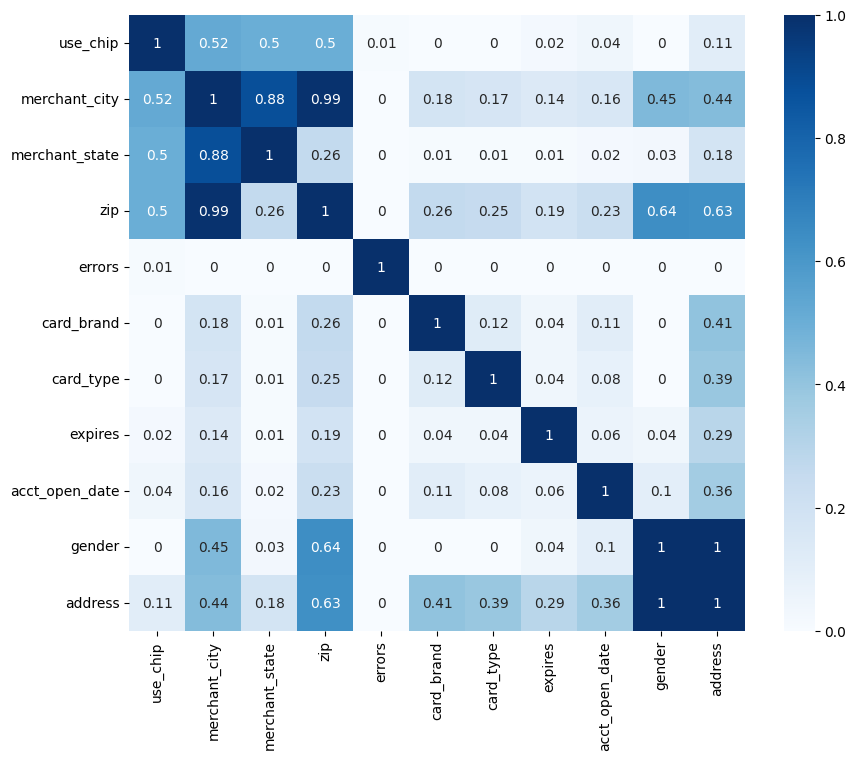

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap of the Cramer's V matrix

plt.figure(figsize=(10,8))
sns.heatmap(matrix, vmin=0, vmax=1, square=True,annot=True, cmap='Blues')
plt.show()

In [28]:
training

,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,fraud_label,year,month,day
0,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,Desconocido,Mastercard,Debit (Prepaid),5497590243197280,07/2022,306,1,2,55,05/2008,2008,30,67,1989,7,Female,594 Mountain View Street,46.80,-100.76,23679,48277,110153,740,4,0.0,2010,1,1
1,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,Desconocido,Mastercard,Credit,5175842699412235,12/2024,438,1,1,9100,09/2005,2015,48,67,1971,6,Male,604 Pine Street,40.80,-91.12,18076,36853,112139,834,5,0.0,2010,1,1
2,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,Desconocido,Mastercard,Debit,5874992802287595,05/2020,256,1,1,14802,01/2006,2008,49,65,1970,4,Male,2379 Forest Lane,33.18,-117.29,16894,34449,36540,686,3,0.0,2010,1,1
4,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,Desconocido,Visa,Debit,4354185735186651,01/2020,120,1,1,19113,07/2009,2014,51,69,1968,5,Male,166 River Drive,38.86,-76.60,33529,68362,96182,711,2,0.0,2010,1,1
5,1807,165,4.81,Swipe Transaction,20519,Bronx,NY,10464.0,5942,Desconocido,Mastercard,Debit (Prepaid),5207231566469664,03/2014,198,1,1,89,01/2008,2015,47,65,1972,12,Female,14780 Plum Lane,40.84,-73.87,25537,52065,98613,828,5,0.0,2010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305905,672,5001,12.93,Chip Transaction,47508,Cosby,TN,37722.0,7230,Desconocido,Visa,Debit,4598597915590543,01/2020,17,1,1,8333,10/2003,2007,37,68,1983,2,Male,95873 Madison Boulevard,35.81,-83.25,11755,23967,3880,722,4,0.0,2019,10,31
13305906,1384,3723,67.01,Chip Transaction,58136,Williamson,GA,30292.0,5812,Desconocido,Visa,Debit,4025390379737737,02/2020,473,1,2,24617,07/2004,2006,74,67,1946,1,Female,528 Lake Drive,38.53,-90.00,22545,23011,30510,721,3,0.0,2019,10,31
13305910,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,Desconocido,Mastercard,Debit,5766352389579834,02/2020,992,1,1,26743,03/2019,2019,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,33483,196,698,5,0.0,2019,10,31
13305911,1766,2066,12.80,Online Transaction,39261,ONLINE,Desconocido,Desconocido,5815,Desconocido,Mastercard,Debit,5960254965868032,06/2024,91,1,1,5141,03/2004,2012,62,66,1957,9,Male,6076 Bayview Boulevard,43.06,-87.96,9995,20377,12092,789,4,0.0,2019,10,31


In [103]:
# Drop merchant_state, zip, gender, adress.
training = training.drop(columns=["merchant_state","zip","gender","address"])
Prediction = Prediction.drop(columns=["merchant_state","zip","gender","address"])

Analisis de numericos y luego label encoder y varios

In [30]:
def get_corr_matrix(dataset = None, metodo='pearson', size_figure=[50,30]):
    
    '''
    Returns a plot of a correlation matrix using the Pearson method.
    :param dataset: Dataset to analyze
    :param metodo: Method of correlation
    :param size_figure: Configuration of the size of the plot
    :return: Plot
    '''
    if dataset is None:
        print(u'\nHace falta pasar un dataset a la función')
   
    corr = dataset.corr(method=metodo) 
    
    for i in range(corr.shape[0]):
        corr.iloc[i, i] = 0
        
    f, ax = plt.subplots(figsize=size_figure)
    sns.heatmap(corr,annot=True, cmap =plt.cm.Reds, ax = ax )
    ax.set_title('Matriz de Correlación')
    plt.show()     

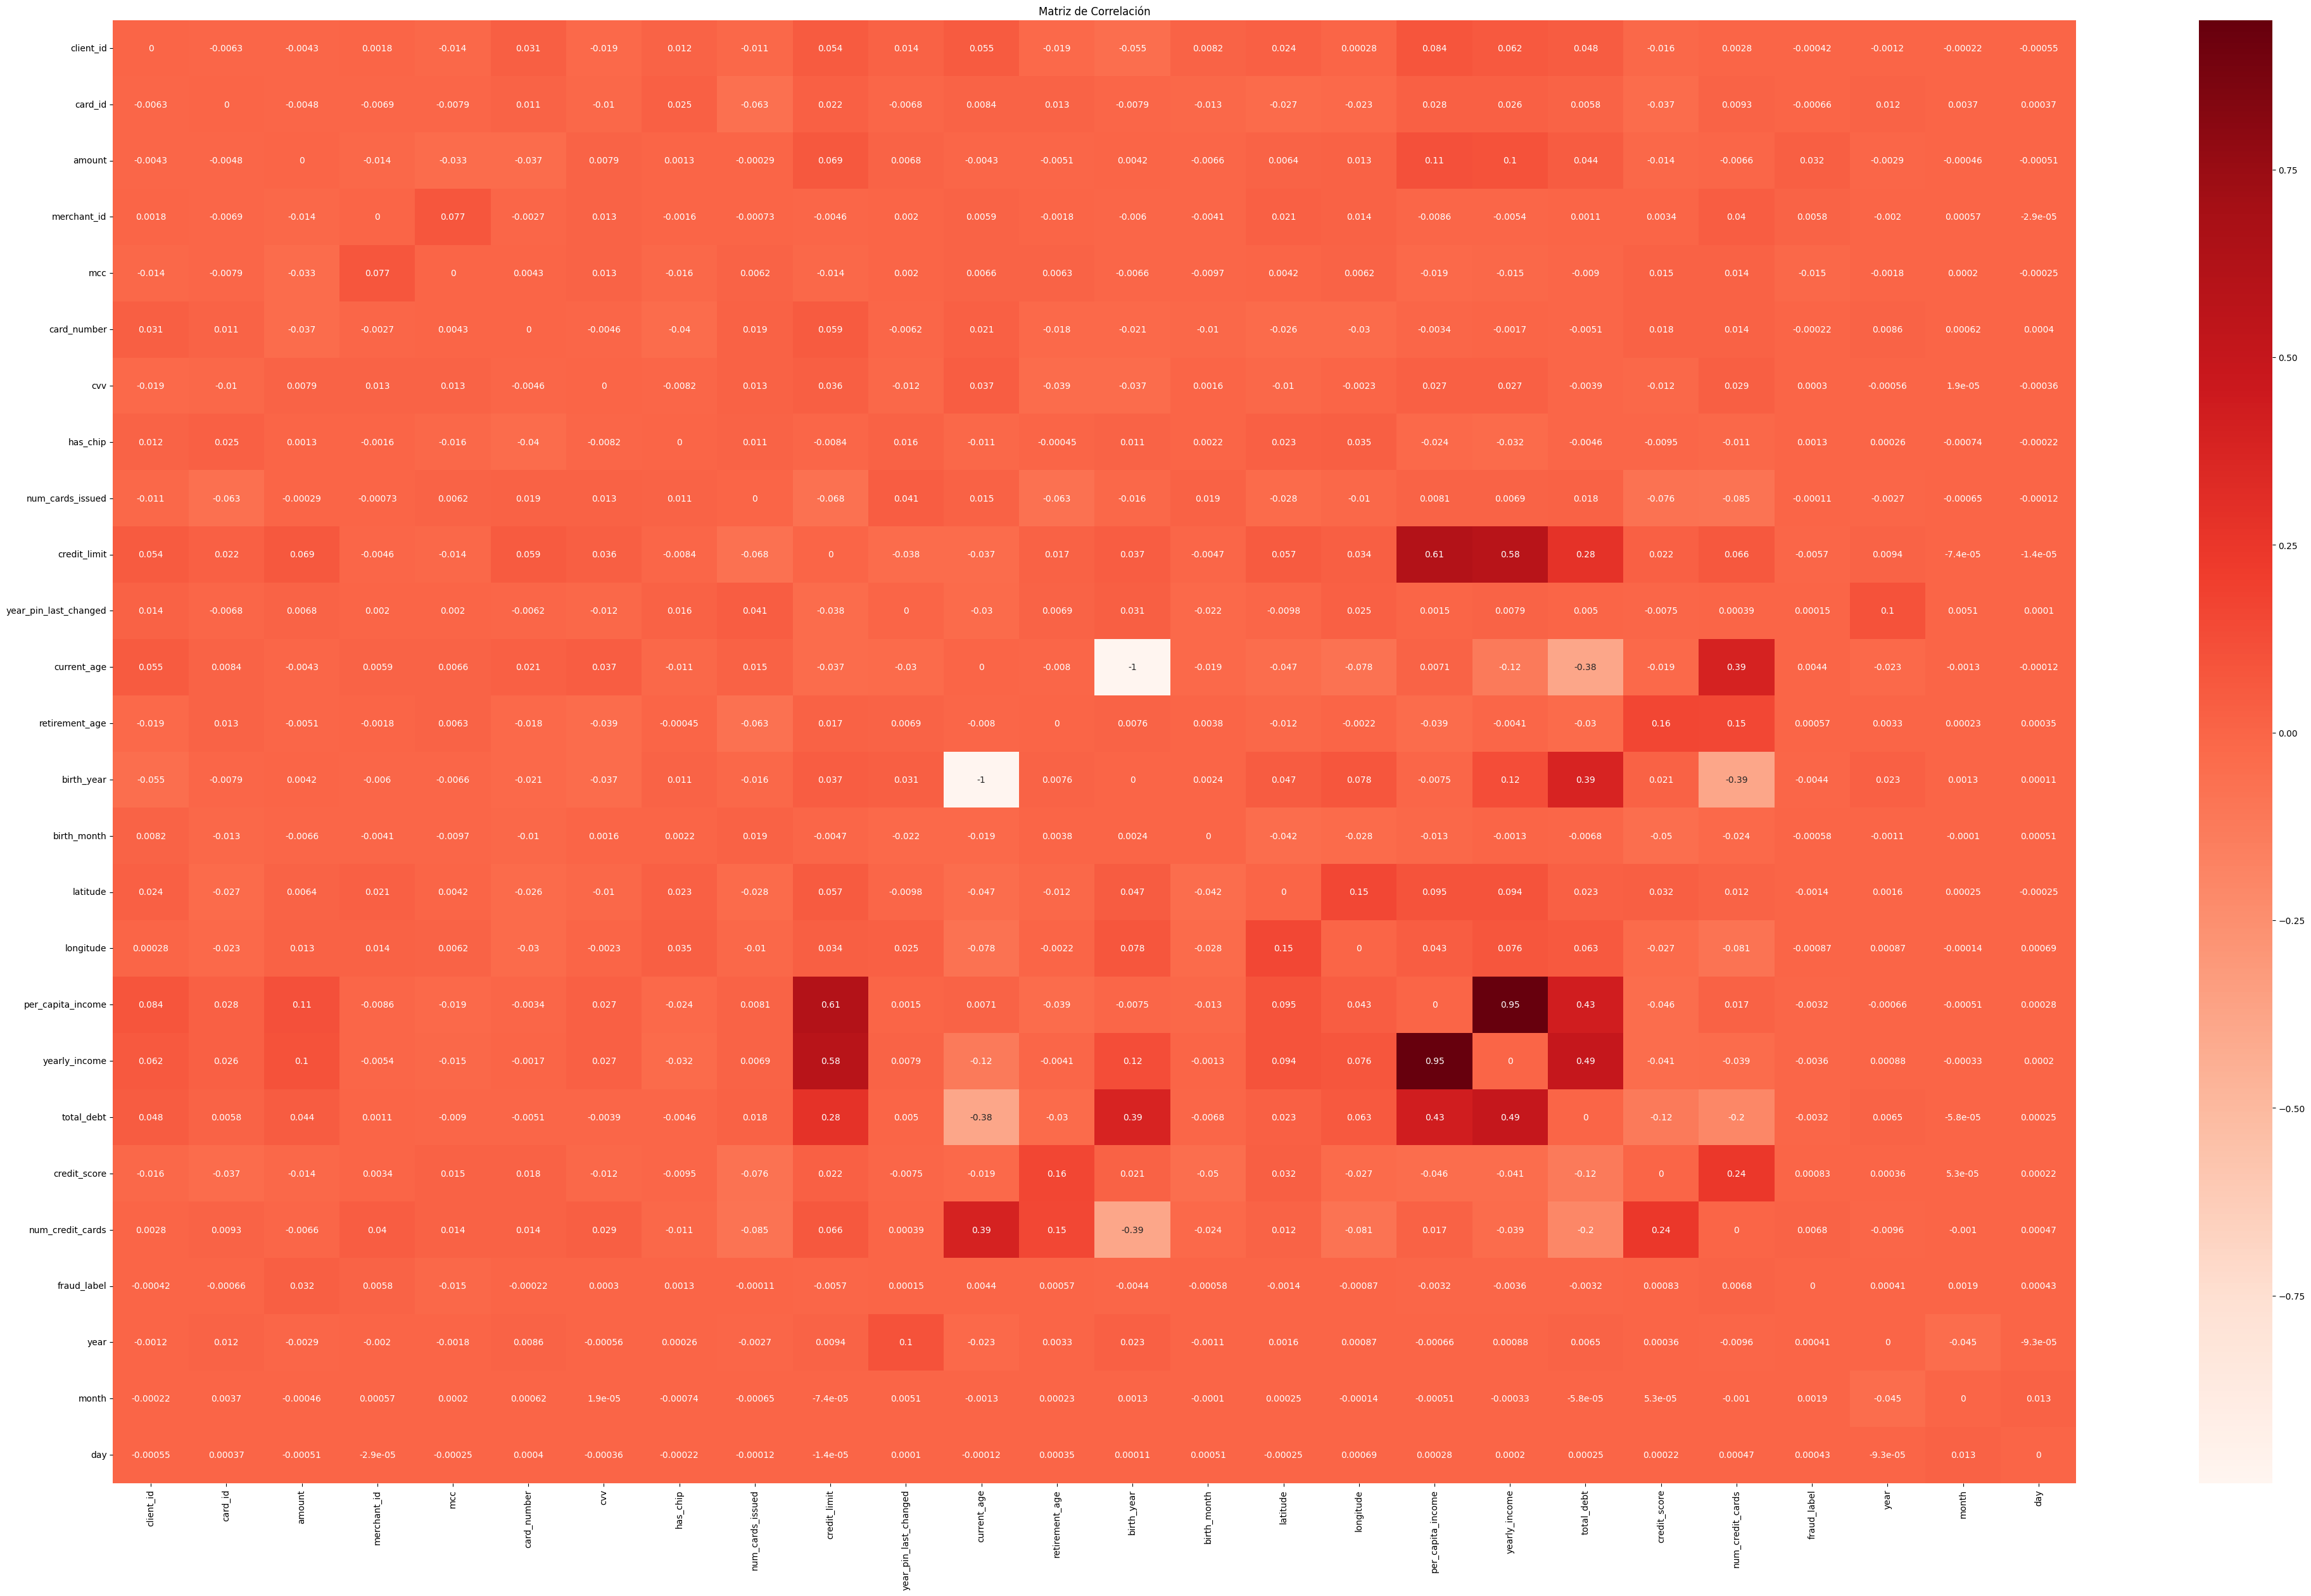

In [31]:
# Display the correlation matrix of the 'num_var_df'. 

get_corr_matrix(dataset = training[variables_numericas], metodo='pearson', size_figure=[50,30])

In [104]:
# Drop per_capita_income.
training = training.drop(columns=["per_capita_income"])
Prediction = Prediction.drop(columns=["per_capita_income"])

In [52]:
# Haz una funcion que meta en una lsita llamada variables categoriacas aquellas que sean dtype object.
variables_categoricas = []
for variable in training.columns:
    if training[variable].dtype == "object":
        variables_categoricas.append(variable)

print(variables_categoricas)

# Lo mismo pero para nuemricas.
variables_numericas = []
for variable in training.columns:
    if training[variable].dtype != "object":
        variables_numericas.append(variable)

print(variables_numericas)

['use_chip', 'merchant_city', 'errors', 'card_brand', 'card_type', 'expires', 'acct_open_date']
['client_id', 'card_id', 'amount', 'merchant_id', 'mcc', 'card_number', 'cvv', 'has_chip', 'num_cards_issued', 'credit_limit', 'year_pin_last_changed', 'current_age', 'retirement_age', 'birth_year', 'birth_month', 'latitude', 'longitude', 'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards', 'fraud_label', 'year', 'month', 'day']


In [54]:
# Crear funcion que haga una lista de las variabkels categoricas que tienen mas de 7 valores unicos.
variables_categoricas_largas = []
variables_categoricas_cortas = []
for variable in variables_categoricas:
    if len(training[variable].unique()) > 7:
        variables_categoricas_largas.append(variable)
    else:
        variables_categoricas_cortas.append(variable)

print(variables_categoricas_largas)
print(variables_categoricas_cortas)

['merchant_city', 'errors', 'expires', 'acct_open_date']
['use_chip', 'card_brand', 'card_type']


In [105]:
# Drop from variables_numericas fraud_label.
variables_numericas = [variable for variable in variables_numericas if variable != "fraud_label"]

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Definir las columnas categóricas y numéricas
categorical_many = [col for col in training.select_dtypes(include=['object', 'category']).columns if training[col].nunique() >= 7]
categorical_few = [col for col in training.select_dtypes(include=['object', 'category']).columns if training[col].nunique() < 7]
numerical_cols = training.select_dtypes(include=['float64', 'int64']).columns.difference(['fraud_label']).tolist()

# Aplicar LabelEncoder manualmente a las categorías grandes
for col in categorical_many:
    le = LabelEncoder()
    training[col] = le.fit_transform(training[col])

# Dividir en características (X) y objetivo (y)
X = training.drop(columns=['fraud_label'])
y = training['fraud_label'].values

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Definir el preprocesador para OneHotEncoder y StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat_few', OneHotEncoder(handle_unknown='ignore'), categorical_few)
    ],
    remainder='passthrough'  # Para mantener las columnas de LabelEncoder
)

In [107]:
# Aplicar el preprocesamiento a los conjuntos de entrenamiento y prueba
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [108]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Crear el dataset de LightGBM con los datos de entrenamiento
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Parámetros para el modelo de LightGBM
params = {
    'objective': 'binary',  # Ajustar si la tarea es clasificación binaria
    'metric': 'binary_logloss',  # Otras opciones: 'auc' o 'binary_error' dependiendo de la métrica que prefieras
    'boosting_type': 'gbdt',  # Método de boosting, puede ser 'gbdt', 'dart', etc.
    'num_leaves': 31,  # Ajustar según el dataset
    'learning_rate': 0.05,  # Tasa de aprendizaje
    'feature_fraction': 0.9  # Proporción de características a usar en cada iteración de boosting
}

# Entrenamiento del modelo
lgb_model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
)

# Predicción en el conjunto de prueba
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred]  # Convertir las probabilidades en etiquetas binarias

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred_binary)
report = classification_report(y_test, y_pred_binary)

print(f"Exactitud del modelo: {accuracy:.4f}")
print("Informe de clasificación:")
print(report)

[LightGBM] [Info] Number of positive: 9999, number of negative: 6676223
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4118
[LightGBM] [Info] Number of data points in the train set: 6686222, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001495 -> initscore=-6.503823
[LightGBM] [Info] Start training from score -6.503823
Exactitud del modelo: 0.9992
Informe de clasificación:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   2225408
         1.0       0.75      0.73      0.74      3333

    accuracy                           1.00   2228741
   macro avg       0.88      0.86      0.87   2228741
weighted avg       1.00      1.00      1.00   2228741



In [109]:
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

#  Poner 1 si la probabilidad es mayor a 0.5 y 0 si es menor.
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred]

In [110]:
# Guardar transactions_id en una lsita para leugo recueprarla al borrarla.
transactions_id = Prediction["transactions_id"].values

# Drop transactions_id from the training df.
Prediction = Prediction.drop(columns=["transactions_id"])

# Drop fraud_label from the Prediction df.
Prediction = Prediction.drop(columns=["fraud_label"])

In [111]:
# Aplicar LabelEncoder manualmente a las categorías grandes
for col in categorical_many:
    le = LabelEncoder()
    Prediction[col] = le.fit_transform(Prediction[col])

In [112]:
# Transform prediction with the preprocessor.

Prediction_array = preprocessor.transform(Prediction)


In [114]:
# Predict
Prediction_results = lgb_model.predict(Prediction_array, num_iteration=lgb_model.best_iteration)

In [148]:
# Convert to binary.
Prediction_results_binary = [1 if x > 0.07 else 0 for x in Prediction_results]

# Create a DataFrame with the transactions_id and the predictions.

Prediction_df = pd.DataFrame({"transactions_id": transactions_id, "fraud_label": Prediction_results_binary})



In [149]:
Prediction_df.fraud_label.value_counts()

fraud_label
0    2881132
1       9820
Name: count, dtype: int64

In [150]:
Prediction_df

,transactions_id,fraud_label
0,7475331,0
1,7475336,0
2,7475337,0
3,7475343,0
4,7475364,0
...,...,...
2890947,23761856,0
2890948,23761864,0
2890949,23761865,0
2890950,23761867,0


In [151]:
# Convertir fraud_label en 'Yes' o 'No'
Prediction_df['fraud_label'] = Prediction_df['fraud_label'].apply(lambda x: "Yes" if x == 1 else "No")

# Crear diccionario para JSON
json_dict = {"target": dict(zip(Prediction_df['transactions_id'].astype(str), Prediction_df['fraud_label']))}


In [152]:
json_dict

# Guardar el diccionario en un archivo JSON
with open("predictions_3.json", "w") as file:
    json.dump(json_dict, file)